C:\Users\KUBA\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\KUBA\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[15.95795733 19.17105155 29.7073493  ...  5.46414971  9.22882465
 24.02732939]
[3.7652134075688806, 15.060853630275522, 33.88692066811993, 60.24341452110209, 94.13033518922201, 135.5476826724797, 184.49545697087515, 240.97365808440836, 304.9822860130793, 376.52134075688804, 455.5908223158346, 542.1907306899188, 636.3210658791409, 737.9818278835006, 847.1730167029981, 963.8946323376334, 1088.1466747874065, 1219.9291440523173, 1359.242040132366, 1506.0853630275521, 1660.4591127378762, 1822.3632892633384, 1991.7978926039377, 2168.7629227596753, 2353.2583797305506, 2545.2842635165634, 2744.840574117714, 2951.9273115340025, 3166.5444757654286, 3388.6920668119924, 3618.3700846736942, 3855.5785293505337, 4100.317400842511, 4352.586699149626, 4612.386424271879, 4879.716576209269, 5154.5771549617975, 5436.968160529464, 5726.889592912267, 6024.341452110209, 6329.323738123289, 6641.836450951505, 6961.879590594861, 7289.453157053354, 7624.557150326983, 7967.191570415751, 8317.356417319657, 8675.05

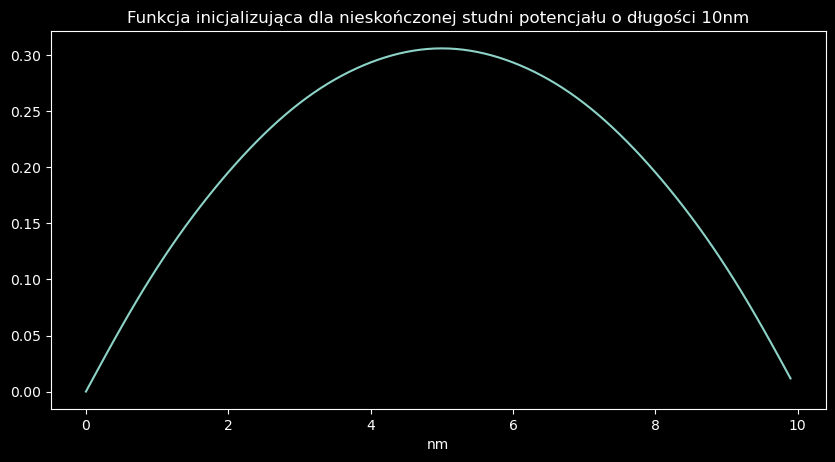

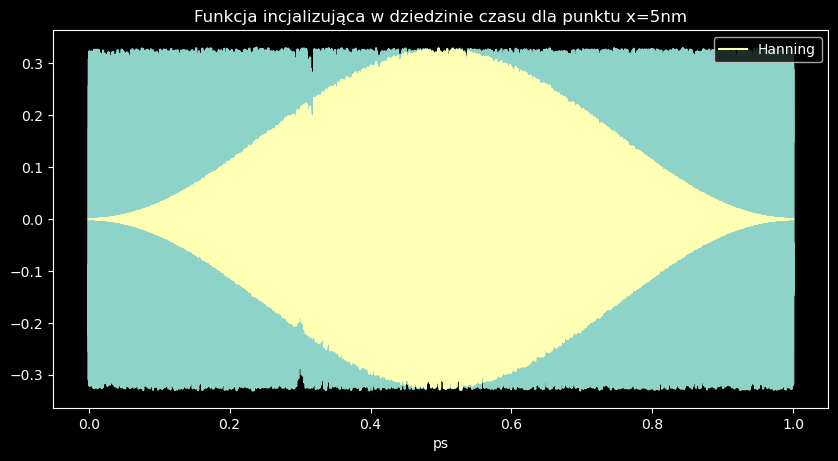

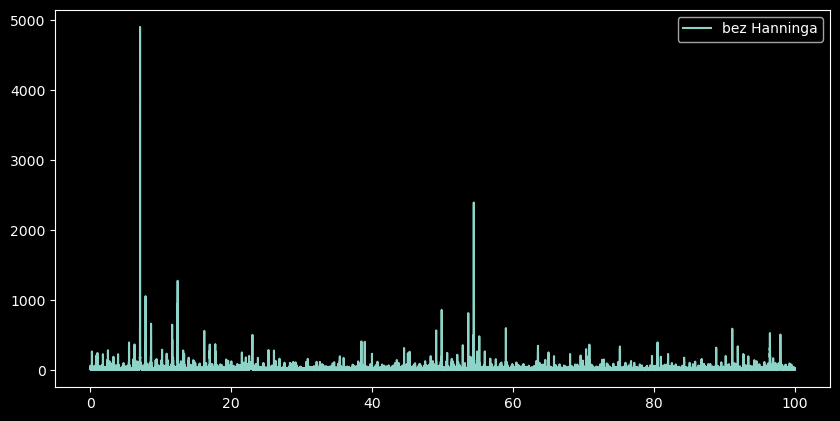

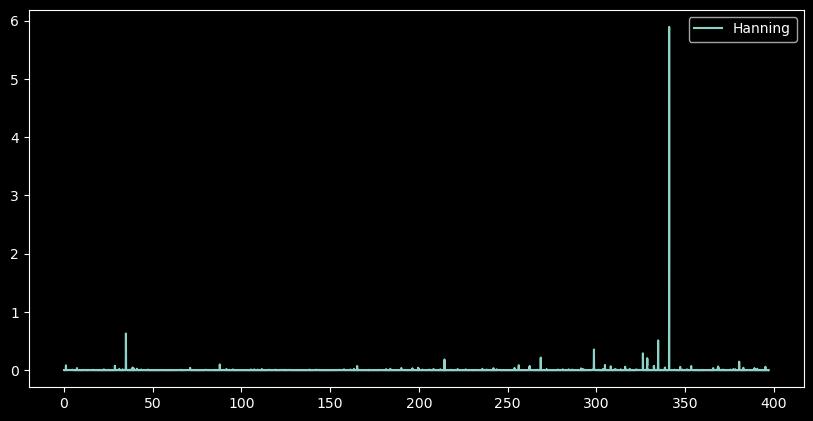

In [5]:
from scipy.fft import dct, idct
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy.integrate as integrate
from scipy.signal import hanning
import sympy as sp
from numpy.fft import fft, ifft
import scipy
from scipy.signal import find_peaks


plt.style.use('dark_background')


def nums(first_number, last_number, step=1):
    return range(first_number, last_number+1, step)
C = sp.Symbol('C', real = False)
h=1.054*10**(-34)
m=9.1*10**(-31)
a=10*10**(-9)
q= np.pi**2*h**2/(2*m*a**2)

e1= list(range(0,101))
for i in nums(0, 100):
    e1[i]=(i+1)**2*q/(1.6*10**(-22))
    
D= [None]*10
for i in nums(1, 10):
    if(i%2==0):
        D[i-1]=0
    else:
        D[i-1]=8*3.87/(i*np.pi)**3
x=sp.Symbol('x', real=True)
F= list(range(0,9))
phi=sp.Function('phi', real=True)

def phi(x): 
    b=0
    X=0
    for i in range(len(F)): 
        X+=D[i]*np.sqrt(1/10)*np.sin(10**(-9)*x*(i+1)*np.pi/a)
    b=X
    X=0
    return b
G= [None]*10
def Phi(t): 
    b=0
    X=0
    A1=0
    A2=0
    for i in range(len(F)): 
        X+=D[i]*np.exp(1j*(e1[i]/h)*t*10**12)*np.sqrt(1/10)*np.sin(10**(-9)*5*(i+1)*np.pi/a)
        A=D[i]*np.exp(1j*(e1[i]/h)*t*10**12)*np.sqrt(1/10)*np.sin(10**(-9)*5*(i+1)*np.pi/a)
        A1+= np.real(A)
        A2+= np.imag(A)
        #print(A)
        #print(A1)
        #print(A2)
        #print(X)
    b= A1 + 1j*A2#A1+A2#X#np.sqrt(A1**2+A2**2)
    X=0
    return b
#print(Phi(0.1))
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
x = np.arange(0, 10, 0.1)
y1 = phi(x)

ax.plot(x, y1)
ax.set_title(r"Funkcja inicjalizująca dla nieskończonej studni potencjału o długości 10nm")
ax.set_xlabel('nm')

fig, ax = plt.subplots(figsize=(10,5), dpi=100)
t = np.linspace(0,1,2**15)
y1 = Phi(t)
y1w = Phi(t)*scipy.signal.windows.hann(int(len(t)))
ax.plot(t, y1)
ax.plot(t, y1w, label="Hanning")
leg=ax.legend()


plt.style.use('dark_background')

ax.set_title(r"Funkcja incjalizująca w dziedzinie czasu dla punktu x=5nm")
ax.set_xlabel('Psi')
ax.set_xlabel('ps')
#fig, ax = plt.subplots(figsize=(10,5), dpi=100)

#y2 =np.abs((np.fft.fft(y1))**2)
#print(y2)

t2 = np.linspace(0,10,2**15)
#ax.plot(t2, y2, label="bez Hanninga")
leg=ax.legend()
df=3.052*10**6
dE=12.6*10**(-3)#*10**(-19) #J

N=2**15 

fig, ax = plt.subplots(figsize=(10,5), dpi=100)

freq = (np.fft.fftfreq(t2.size, d=dE))
freq2=np.abs(np.fft.fftshift(freq))
y2w = np.abs((np.fft.fft(y1*scipy.signal.windows.hann(int(len(freq2)))))**2)*10**(-6)

#print(freq)

#ax.plot(freq, y2w, label="Hanning")
ax.plot(freq2, y2w, label="Hanning")
leg=ax.legend()

#height_threshold=0.2*10**7 # We need a threshold. 
#peaks_index, properties = find_peaks((y2w), height=height_threshold)
#print('Positions and magnitude of frequency peaks:')
#[print("%4.4f    \t %3.4f" %(freq[peaks_index[i]], properties['peak_heights'][i])) for i in range(len(peaks_index))]
#plt.plot(freq, (y2w),'-', freq[peaks_index],properties['peak_heights'],'x')
#plt.xlabel("Frequency")
##plt.ylabel("Amplitude")
#plt.show()
min_val=np.max(y2w)
#print(np.max(y2w))
bbb = np.where(x == min_val)
#index = y2w.index(np.max(y2w))
#print(bbb)

aaa=5.893662512682845
aaaa=0.6286977161762795
print('pierwsza energia FFT [meV]')
for(i ) in range(len(y2w)): 
    if (y2w[i]==aaaa):
       # print(y2w[i])
        print(freq2[i])
print('pierwsza energia [meV]')
print(e1[0])

print('druga energia FFT [meV]')

for(i ) in range(len(y2w)): 
    if (y2w[i]==aaa):
       # print(y2w[i])
        print(freq2[i])
        

print('druga energia [meV]')
print(e1[2])


  
        
#y2w=fft(y2*w)
#xf = fftfreq(2**15, 1/800)[:2**15//2]
#ax.plot(t, y2w)


# 